### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 7938</pre>

In [53]:
# student 1: Israel 7938
# student 2: Eran 6215
# student 3: Avihai 2474
# student 4: Almog 8269
# student 5: Liron 5068
# student 6: Matan ####

In [54]:
#test

## Part 2 - Experiments
You could add as many code cells as needed

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [56]:
df_train = pd.read_csv('titanic_train.csv')

In [57]:
#Men
survivedMan = df_train[(df_train['Sex'] == 1) & (df_train['Age'] > 18) & (df_train['Survived'] == 1)]
survivedManCount = len(survivedMan)
print("Survived man :",survivedManCount)

#Women
survivedWomen = df_train[(df_train['Sex'] == 0) & (df_train['Age'] > 18) & (df_train['Survived'] == 1)]
survivedWomenCount = len(survivedWomen)
print("survived women:",survivedWomenCount)
#Kids
survivedKids = df_train[(df_train['Age'] <= 18) & (df_train['Survived'] == 1)]
survivedKidsCount = len(survivedKids)
print("survived kids",survivedKidsCount)

survivedCount = len(df_train[df_train['Survived'] == 1])
print("survivels: ",survivedCount)

Survived man : 69
survived women: 156
survived kids 56
survivels:  281


In [58]:
df_train.isnull().sum() 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

## Visualization

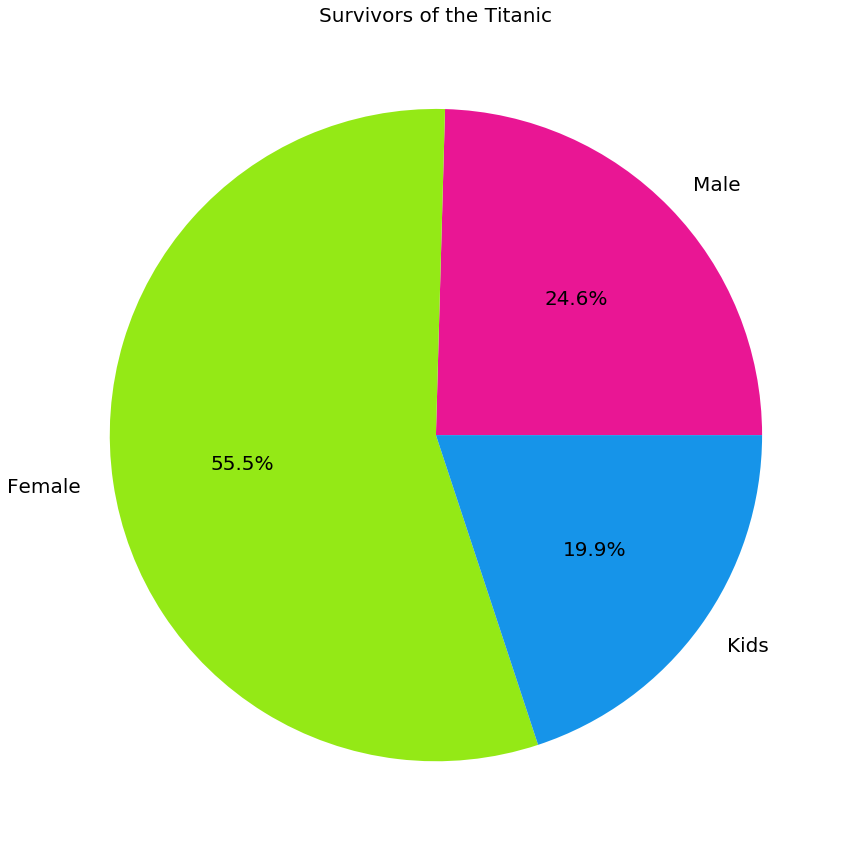

In [59]:
population = [survivedManCount,survivedWomenCount,survivedKidsCount]
labels = ['Male', 'Female','Kids']
colors = ['#E91694', '#94E916', '#1694E9']
fig,ax = plt.subplots(figsize=(20, 15))
ax.pie(population,labels = labels,autopct='%1.1f%%',colors=colors, textprops={'fontsize': 20})
plt.title('Survivors of the Titanic', fontsize=20)
fig.patch.set_facecolor('white')
plt.show()

In [60]:
data = {'Category': ['Male', 'Female', 'Kids', 'Total'],
        'Survived': [survivedManCount, survivedWomenCount, survivedKidsCount, survivedCount]}
Survivors1 = pd.DataFrame(data)
Survivors1['Percentage'] = Survivors1['Survived'].apply(lambda x: round((x / survivedCount) * 100, 1))
Survivors1

,Category,Survived,Percentage
0,Male,69,24.6
1,Female,156,55.5
2,Kids,56,19.9
3,Total,281,100.0


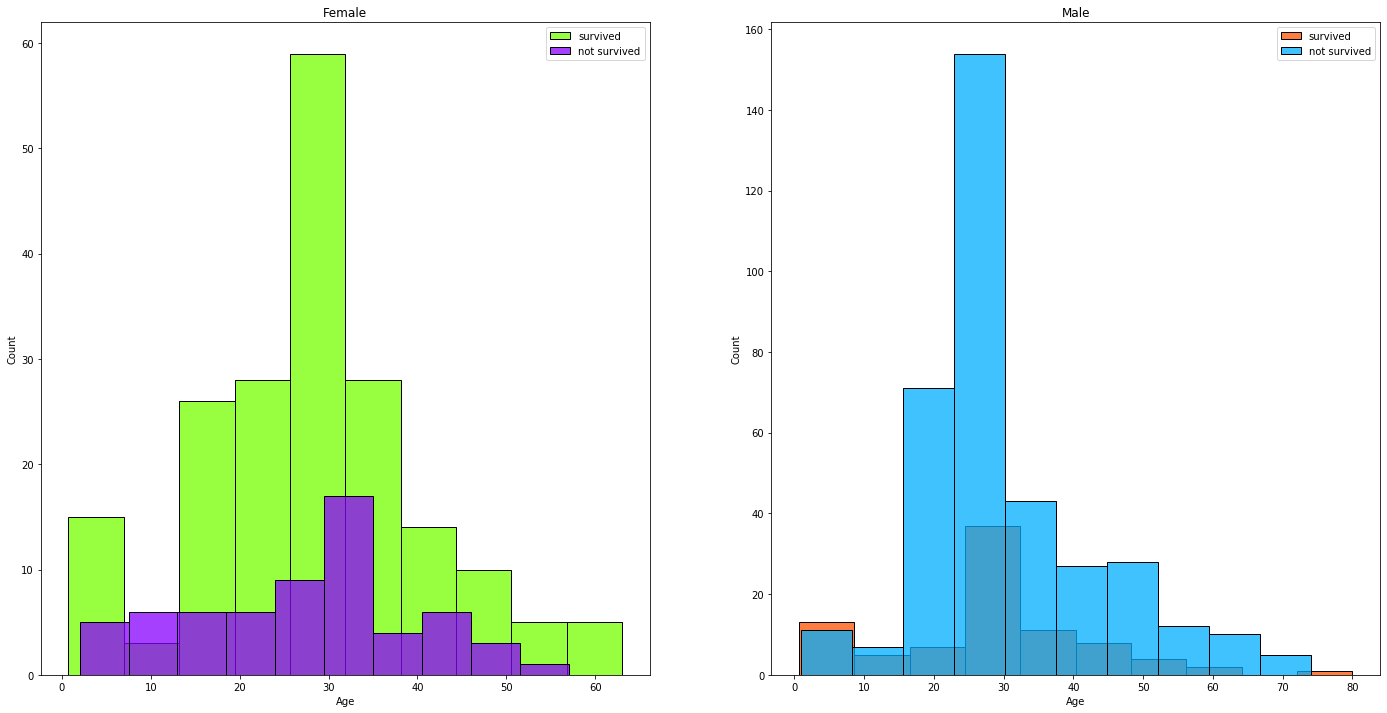

In [61]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(24, 12))
women = df_train[df_train['Sex']==0]
men = df_train[df_train['Sex']==1]
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[0], kde =False, color="#76FF00")
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[0], kde =False, color="#8900FF")
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[1], kde = False, color="#FF5100")
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[1], kde = False, color="#00AEFF")
ax.legend()
_ = ax.set_title('Male')

In [62]:
# Define categories (survived, not survived)
categories = ['survived', 'not survived']

women_survived = df_train[(df_train["Sex"] == 1) & (df_train["Survived"] == 1)]  # survived women
women_not_survived = df_train[(df_train["Sex"] == 1) & (df_train["Survived"] == 0)]  # non-survived women
men_survived = df_train[(df_train["Sex"] == 0) & (df_train["Survived"] == 1)]  # Ages of survived men
men_not_survived = df_train[(df_train["Sex"] == 0) & (df_train["Survived"] == 0)]  # Ages of non-survived men


data = {'Category': ['survived men', 'survived women', 'not-survived women', 'not-survived men'], 
        'Survived': [len(men_survived), len(women_survived), len(women_not_survived), len(men_not_survived)]}


Survivors2 = pd.DataFrame.from_dict(data, orient='index').transpose()

# Display the DataFrame
Survivors2


,Category,Survived
0,survived men,193
1,survived women,88
2,not-survived women,368
3,not-survived men,63


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [63]:
train_set = pd.read_csv("titanic_train.csv")
train_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [64]:
def min_max_scale(series, feature_range=(1, -1)):
    min_val = series.min()
    max_val = series.max()
    scale = (feature_range[1] - feature_range[0]) / (max_val - min_val)
    scaled_series = scale * (series - min_val) + feature_range[0]
    return scaled_series

In [65]:
x_train = train_set[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_train = train_set['Survived']

In [66]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

## Part 4 - Apply on test and show model performance estimation

## KNN algorithm learning:

In [67]:
test_set = pd.read_csv("titanic_test.csv")

In [68]:
x_test = test_set[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y_test = test_set['Survived']

In [69]:
y_predict = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_predict)
print("accuracy: ", accuracy)

accuracy:  0.7486033519553073


In [70]:
neighbors = np.arange(1, 100)
accuracy_scores=[]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

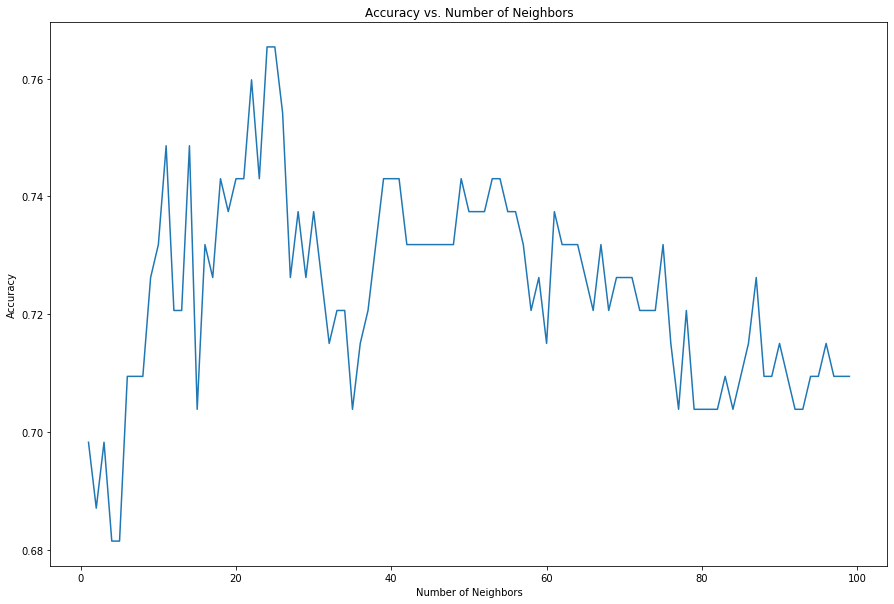

In [78]:
plt.figure(figsize=(15, 10))
plt.plot(neighbors, accuracy_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

## Naive Bayes algorithm learning:

In [72]:
train_set = pd.read_csv("titanic_train.csv")
test_set = pd.read_csv("titanic_test.csv")

In [73]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x_train = train_set[features].apply(pd.to_numeric)
y_train = train_set['Survived'].apply(pd.to_numeric)
x_test = test_set[features].apply(pd.to_numeric)

Max accuracy for Naive Bayes algorithm: 0.7684210526315789


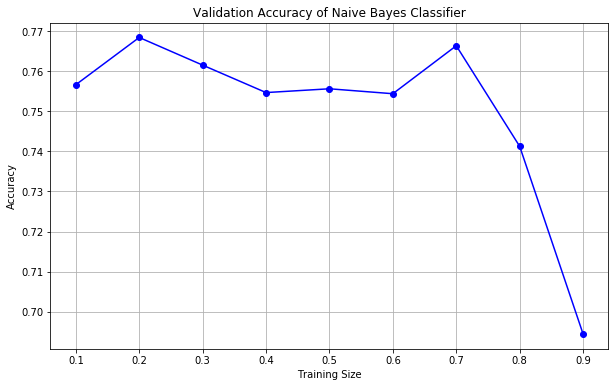

In [74]:
nb = GaussianNB()
training_sizes = np.linspace(0.1, 0.9, 9)
accuracies = []
max_accuracy = -999999
for size in training_sizes:
    x_train_split,x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, train_size=size, random_state=42)
    nb.fit(x_train_split, y_train_split)
    val_predictions = nb.predict(x_val_split)
    accuracy = accuracy_score(y_val_split, val_predictions)
    accuracies.append(accuracy)
    if accuracy > max_accuracy:
        max_accuracy = accuracy

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy of Naive Bayes Classifier')
plt.grid(True)
print("Max accuracy for Naive Bayes algorithm: {}".format(max_accuracy))
plt.show()